# Example Random Forest application to CRISM data

In [168]:
import pandas as pd
import geopandas as gpd
tn = '434_2'
in_file = f'/Users/phillipsm/Documents/Research/MassifMapping/Argyre_QGIS/shape_files/Argyre/categorized_olivine_2/T0{tn}.gpkg' #categorized_olivine_2
tile_gpkg = gpd.read_file(in_file)
tile_gpkg

,Polygon Number,Color,Number of Points,Denominator,Template,Mineral ID 1,Mineral ID 2,Mineral ID 3,Mineral ID 4,wvl,Spectrum Mean,params,Parameters Mean,Best Denom ID,Ratio Spectrum,Category,geometry
0,0,yellow,26,[ ],[ ],plagioclase,,,,410.12 442.63 533.74 598.86 650.99 683.59 709....,[0.02441441 0.04323724 0.08202752 0.13889372 0...,R770 RBR BD530_2 SH600_2 SH770 BD640_2 BD860_2...,[ 1.7500207e-01 4.0873079e+00 1.7132452e-01 ...,1,"[1.098492458321257, 1.0537341485501794, 1.0378...",plagioclase (High),"POLYGON ((-63575.461 -2232923.052, -63756.286 ..."
1,1,darkkhaki,26,[ ],[ ],bland,denom,,,410.12 442.63 533.74 598.86 650.99 683.59 709....,[0.02260234 0.04143364 0.07966855 0.13718224 0...,R770 RBR BD530_2 SH600_2 SH770 BD640_2 BD860_2...,[ 1.73521116e-01 4.24405479e+00 1.81198239e-...,n,nan,Other (High),"POLYGON ((-63394.635 -2234369.653, -63575.461 ..."
2,2,yellow,35,[ ],[ ],plagioclase,,,,410.12 442.63 533.74 598.86 650.99 683.59 709....,[0.02362762 0.04528009 0.08541859 0.14520282 0...,R770 RBR BD530_2 SH600_2 SH770 BD640_2 BD860_2...,[ 1.8668257e-01 4.1900082e+00 1.7398927e-01 ...,3,"[1.0121719928899247, 1.0067945335796518, 1.018...",plagioclase (High),"POLYGON ((-64841.236 -2239794.406, -64841.236 ..."
3,3,darkkhaki,35,[ ],[ ],bland,denom,,,410.12 442.63 533.74 598.86 650.99 683.59 709....,[0.02394688 0.04499621 0.08404379 0.14248459 0...,R770 RBR BD530_2 SH600_2 SH770 BD640_2 BD860_2...,[ 1.8097979e-01 4.0901742e+00 1.7366217e-01 ...,n,nan,Other (High),"POLYGON ((-64660.411 -2240879.357, -64660.411 ..."
4,4,red,52,[ ],[ ],olivine,±hcp,,,410.12 442.63 533.74 598.86 650.99 683.59 709....,[0.03017404 0.04755452 0.08941892 0.15277305 0...,R770 RBR BD530_2 SH600_2 SH770 BD640_2 BD860_2...,[ 1.9819382e-01 4.2112398e+00 1.7779428e-01 ...,5,"[1.0595225908260613, 1.0337167415141921, 1.034...",hcp + olivine (Moderate),"POLYGON ((-66830.312 -2237805.330, -66830.312 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,227,darkkhaki,25,[ ],[ ],denom,,,,410.12 442.63 533.74 598.86 650.99 683.59 709....,[0.02056837 0.04351852 0.08656556 0.15069544 0...,R770 RBR BD530_2 SH600_2 SH770 BD640_2 BD860_2...,[ 2.0871314e-01 4.9012647e+00 1.8876430e-01 ...,nan,nan,Other (High),"POLYGON ((73670.790 -2404345.247, 73489.965 -2..."
228,228,red,15,[ ],[ ],olivine,,,,410.12 442.63 533.74 598.86 650.99 683.59 709....,[0.01948367 0.04271495 0.08519026 0.14748695 0...,R770 RBR BD530_2 SH600_2 SH770 BD640_2 BD860_2...,[ 1.9790152e-01 4.7643971e+00 1.8482840e-01 ...,229,[1.0426023 1.0006981 1.0097394 1.0115793 1.013...,Type 1 olivine (High),"POLYGON ((70777.589 -2404706.897, 70777.589 -2..."
229,229,darkkhaki,15,[ ],[ ],denom,,,,410.12 442.63 533.74 598.86 650.99 683.59 709....,[0.01914943 0.04285517 0.08459474 0.1461681 0...,R770 RBR BD530_2 SH600_2 SH770 BD640_2 BD860_2...,[ 1.9621795e-01 4.7106256e+00 1.8505605e-01 ...,nan,nan,Other (High),"POLYGON ((70958.414 -2407057.624, 70958.414 -2..."
230,230,purple,14,[ ],[ ],olivine,±hcp,,,410.12 442.63 533.74 598.86 650.99 683.59 709....,[0.03427971 0.04417982 0.08411968 0.14044322 0...,R770 RBR BD530_2 SH600_2 SH770 BD640_2 BD860_2...,[ 1.7058985e-01 4.0312257e+00 1.6619445e-01 ...,231,[0.9834461 0.9910592 0.9942008 0.99798685 0...,hcp + olivine (Moderate),"POLYGON ((-109143.386 -2432011.487, -109505.03..."


In [169]:
# Extract unique parameters
params = tile_gpkg['params'][0].split()
cnames = ['label'] + params + ['Category'] + ['Color']
# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(columns=cnames)

# Populate the DataFrame with the parameter values for each ROI
for index, row in tile_gpkg.iterrows():
    params = row['params'].split()
    cat_name = row['Category']
    color_ = row['Color']
    param_values = [float(x) if x != 'nan' else float('nan') for x in row['Parameters Mean'].replace('[', '').replace(']', '').split()]
    
    result_df.at[index, 'Category'] = cat_name
    result_df.at[index, 'label'] = cat_name
    result_df.at[index, 'Color'] = color_
    for i, param in enumerate(params):
        result_df.at[index, param] = param_values[i]

result_df

,label,R770,RBR,BD530_2,SH600_2,SH770,BD640_2,BD860_2,BD920_2,RPEAK1,...,CINDEX2,BD2600,IRR2,IRR3,R1080,R1506,R2529,R3920,Category,Color
0,plagioclase (High),0.175002,4.087308,0.171325,0.157368,0.020386,NaN,-0.043147,-0.007602,0.768184,...,-0.038923,0.008044,0.995002,1.253586,0.157244,0.161065,0.163843,0.189202,plagioclase (High),yellow
1,Other (High),0.173521,4.244055,0.181198,0.162828,0.023161,NaN,-0.038669,-0.004667,0.769445,...,-0.021522,0.008257,0.995414,1.252762,0.15908,0.162698,0.162151,0.164689,Other (High),darkkhaki
2,plagioclase (High),0.186683,4.190008,0.173989,0.155242,0.022593,NaN,-0.0404,-0.007,0.77393,...,-0.016134,0.006292,1.011808,1.270976,0.170971,0.176797,0.185025,0.1836,plagioclase (High),yellow
3,Other (High),0.18098,4.090174,0.173662,0.157177,0.022388,NaN,-0.035814,-0.003261,0.756064,...,-0.031929,0.012476,1.016064,1.267463,0.165076,0.172292,0.177104,0.192871,Other (High),darkkhaki
4,hcp + olivine (Moderate),0.198194,4.21124,0.177794,0.153759,0.021678,NaN,-0.037438,-0.003619,0.758604,...,-0.025754,0.008971,1.02181,1.25741,0.183105,0.196645,0.212603,0.220345,hcp + olivine (Moderate),red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Other (High),0.208713,4.901265,0.188764,0.149801,0.020813,NaN,-0.035404,-0.001342,0.773136,...,0.00689,0.009517,1.008949,1.226275,0.199047,0.213107,0.224877,0.207918,Other (High),darkkhaki
228,Type 1 olivine (High),0.197902,4.764397,0.184828,0.154245,0.018503,NaN,-0.033171,-0.000833,0.757677,...,0.010977,0.016041,1.004737,1.206968,0.184477,0.196962,0.206091,0.183542,Type 1 olivine (High),red
229,Other (High),0.196218,4.710626,0.185056,0.154386,0.019396,NaN,-0.033469,0.001238,0.78395,...,0.02955,0.013665,1.003379,1.221145,0.183671,0.193082,0.198485,0.179869,Other (High),darkkhaki
230,hcp + olivine (Moderate),0.17059,4.031226,0.166194,0.170713,0.016851,NaN,-0.026743,-0.004817,0.727349,...,-0.017936,0.009897,0.993933,1.203991,0.151686,0.158939,0.158966,0.150635,hcp + olivine (Moderate),purple


In [171]:
# Save the DataFrame to a CSV file
result_df.to_csv(f'/Users/phillipsm/Documents/Teaching/AI_in_PlanetaryXXX/Code/00_Introduction/files/t0{tn}_params_by_roi.csv', index=False)

Model Accuracy: 68.18%


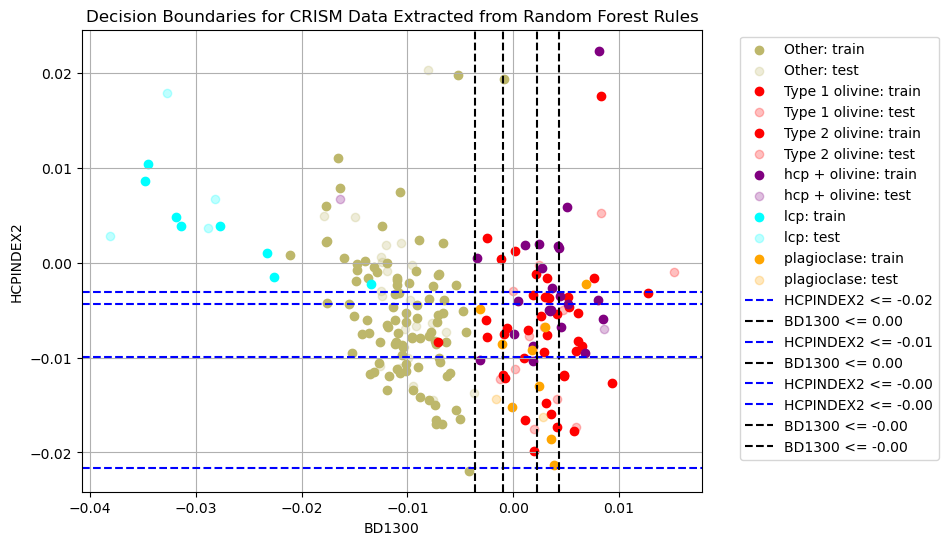

Most Important Rules in the Random Forest:
Node 0: BD920_2 <= -0.00 (Importance: 230.20)
Node 1: LCPINDEX2 <= 0.01 (Importance: 202.13)
Node 35: OLINDEX3 <= 0.15 (Importance: 114.60)
Node 36: RPEAK1 <= 0.76 (Importance: 59.83)
Node 2: OLINDEX3 <= 0.14 (Importance: 47.58)
Node 8: BD1300 <= 0.00 (Importance: 33.44)
Node 44: BD920_2 <= -0.00 (Importance: 31.63)
Node 55: OLINDEX3 <= 0.18 (Importance: 28.83)
Node 48: BD1300 <= -0.00 (Importance: 18.43)
Node 56: RPEAK1 <= 0.74 (Importance: 17.63)
Node 9: RPEAK1 <= 0.73 (Importance: 13.62)
Node 24: BD920_2 <= -0.00 (Importance: 12.42)
Node 37: BD860_2 <= -0.02 (Importance: 10.20)
Node 11: BD920_2 <= -0.00 (Importance: 9.61)
Node 30: LCPINDEX2 <= 0.00 (Importance: 7.61)
Node 63: RPEAK1 <= 0.72 (Importance: 6.37)
Node 57: BD1300 <= -0.00 (Importance: 5.91)
Node 3: LCPINDEX2 <= 0.01 (Importance: 5.48)
Node 38: BD860_2 <= -0.04 (Importance: 5.06)
Node 45: RPEAK1 <= 0.79 (Importance: 4.87)


In [172]:
# libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import _tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
import re

# Load the dataset
csv_path = f'/Users/phillipsm/Documents/Teaching/AI_in_PlanetaryXXX/Code/00_Introduction/files/t0{tn}_params_by_roi.csv'
crism_df = pd.read_csv(csv_path)
crism_df.rename(columns={crism_df.columns[0]: 'label'}, inplace=True)

# Function to remove (High), (Moderate), (Low) designations
def simplify_label(label):
    return re.sub(r'\s*\(.*?\)', '', label)

# Apply the function to the 'label' column
crism_df['label'] = crism_df['label'].apply(simplify_label)

# drop na values
# Remove columns with more than half NA values
crism_df = crism_df.loc[:, crism_df.isna().mean() < 0.93]
crism_df = crism_df.fillna(0)

p_to_include = ['BD1300', 'OLINDEX3', 'LCPINDEX2', 'RPEAK1', 'HCPINDEX2', 'BD860_2', 'BD920_2']

# Drop columns not in p_to_include
crism_df = crism_df[p_to_include + ['label', 'Category', 'Color']]

# # normalize each column in crism_df 
# crism_df.iloc[:, :-3] = (crism_df.iloc[:, :-3] - crism_df.iloc[:, :-3].mean()) / crism_df.iloc[:, :-3].std()

# Get the counts of each simplified label
label_counts = crism_df['label'].value_counts()

# Identify labels with counts less than 9
labels_to_keep = label_counts[label_counts >= 9].index

# Filter the DataFrame to keep only the labels with counts >= 9
crism_df = crism_df[crism_df['label'].isin(labels_to_keep)]

# Drop the 'label', 'Category', and 'Color' columns and get the remaining values
X = crism_df.drop(['label', 'Category', 'Color'], axis=1).values

target_names = np.unique(crism_df['label'].values)
feature_names = [col for col in crism_df.columns if col not in ['label', 'Category', 'Color']]

# create a mapping from integer values to label strings
label_mapping = {label: i for i, label in enumerate(target_names)}
y = np.array([label_mapping[label] for label in crism_df['label'].values])

color_mapping = {label: color for label, color in zip(crism_df['label'], crism_df['Color'])}

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(criterion='entropy', random_state=42)

# Train the model (fit the model to the training data)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Function to extract decision rules
def extract_rules(t, feature_names):
    tree_ = t.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    rules = []
    
    def recurse(node):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            rules.append((name, threshold, node))
            recurse(tree_.children_left[node])
            recurse(tree_.children_right[node])

    recurse(0)  # Start from the root node
    return rules

# Extract rules from the first tree in the trained random forest
rules = extract_rules(rf_classifier.estimators_[0], feature_names)

# Create a scatter plot for petal length and petal width
plt.figure(figsize=(8, 6))

# Plot the training data points
paramX = 'BD1300'
paramY = 'HCPINDEX2'
i1, i2 = (feature_names.index(paramX), feature_names.index(paramY))
y_index = (0, 1, 2, 3, 4, 5)
for yi in y_index:
    plt.scatter(X_train[y_train == yi, i1], X_train[y_train == yi, i2], color=color_mapping[target_names[yi]], label=f'{target_names[yi]}: train')
    plt.scatter(X_test[y_test == yi, i1], X_test[y_test == yi, i2], color=color_mapping[target_names[yi]], label=f'{target_names[yi]}: test', alpha=0.25)

# Adding decision boundaries based on the rules extracted
for feature, threshold, node in rules:
    if feature_names[i1] in feature:
        plt.axvline(x=threshold, color='black', linestyle='--', label=f'{feature} <= {threshold:.2f}')
    elif feature_names[i2] in feature:
        plt.axhline(y=threshold, color='blue', linestyle='--', label=f'{feature} <= {threshold:.2f}')

# Labels and title
plt.xlabel(feature_names[i1])
plt.ylabel(feature_names[i2])
plt.title('Decision Boundaries for CRISM Data Extracted from Random Forest Rules')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Function to extract and sort decision rules by importance
def extract_and_sort_rules(t, feature_names):
    tree_ = t.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    rules = []
    
    def recurse(node):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            importance = tree_.impurity[node] * tree_.n_node_samples[node]
            rules.append((name, threshold, node, importance))
            recurse(tree_.children_left[node])
            recurse(tree_.children_right[node])

    recurse(0)  # Start from the root node
    return sorted(rules, key=lambda x: x[3], reverse=True)

# Extract and sort rules from the first tree in the trained random forest
sorted_rules = extract_and_sort_rules(rf_classifier.estimators_[0], feature_names)

# Print the most important rules
print("Most Important Rules in the Random Forest:")
for feature, threshold, node, importance in sorted_rules[:20]:  # Print top 10 rules
    print(f"Node {node}: {feature} <= {threshold:.2f} (Importance: {importance:.2f})")


In [ ]:
# save the rf_classifier
import joblib
joblib.dump(rf_classifier, '/Users/phillipsm/Documents/Research/MassifMapping/Argyre_QGIS/crism_rf_classifier.joblib')


['/Users/phillipsm/Documents/Research/MassifMapping/Argyre_QGIS/crism_rf_classifier.joblib']

In [12]:
# read the rf_classifier
rf_classifier = joblib.load('/Users/phillipsm/Documents/Research/MassifMapping/Argyre_QGIS/crism_rf_classifier.joblib')

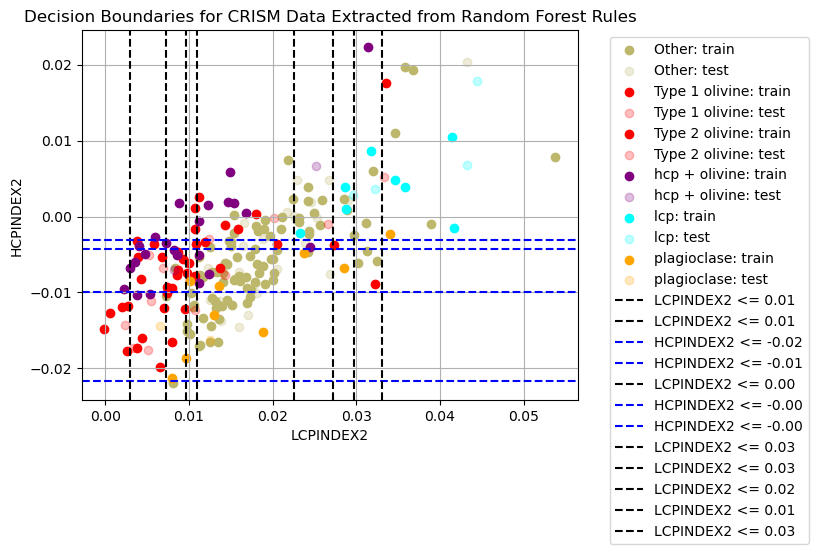

In [173]:
paramX = 'LCPINDEX2'
paramY = 'HCPINDEX2'
i1, i2 = (feature_names.index(paramX), feature_names.index(paramY))
y_index = (0, 1, 2, 3, 4, 5)
for yi in y_index:
    plt.scatter(X_train[y_train == yi, i1], X_train[y_train == yi, i2], color=color_mapping[target_names[yi]], label=f'{target_names[yi]}: train')
    plt.scatter(X_test[y_test == yi, i1], X_test[y_test == yi, i2], color=color_mapping[target_names[yi]], label=f'{target_names[yi]}: test', alpha=0.25)

# Adding decision boundaries based on the rules extracted
for feature, threshold, node in rules:
    if feature_names[i1] in feature:
        plt.axvline(x=threshold, color='black', linestyle='--', label=f'{feature} <= {threshold:.2f}')
    elif feature_names[i2] in feature:
        plt.axhline(y=threshold, color='blue', linestyle='--', label=f'{feature} <= {threshold:.2f}')

# Labels and title
plt.xlabel(feature_names[i1])
plt.ylabel(feature_names[i2])
plt.title('Decision Boundaries for CRISM Data Extracted from Random Forest Rules')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

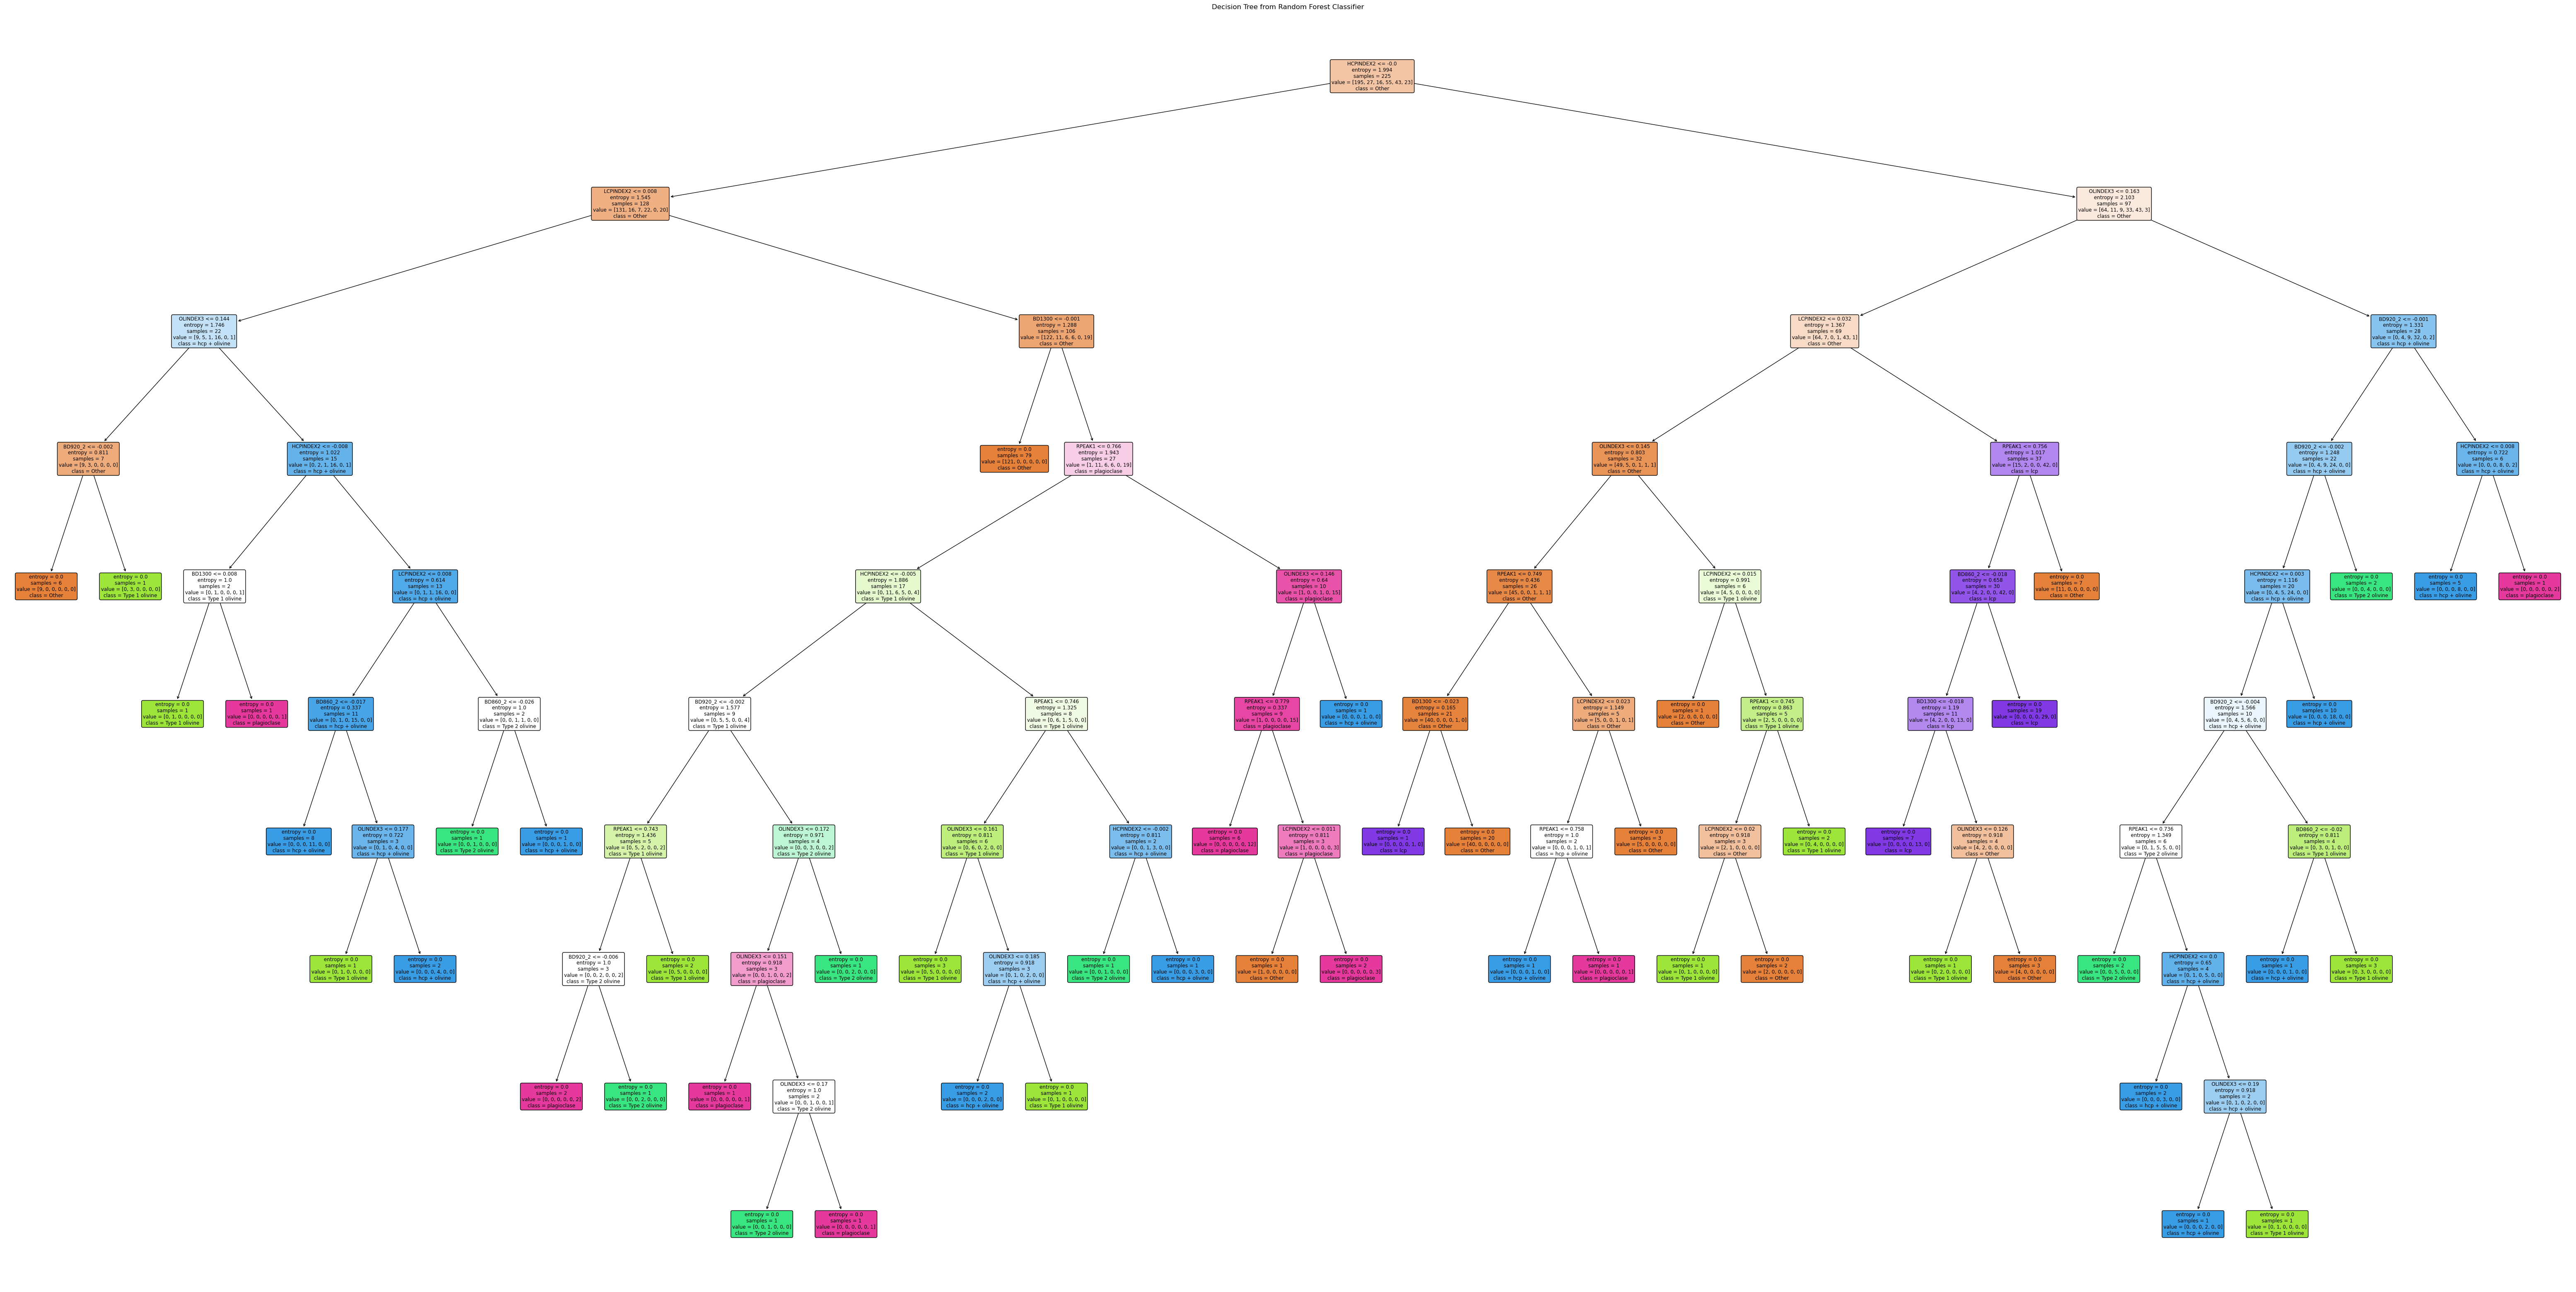

In [14]:
from sklearn.tree import plot_tree

# Plot the first decision tree in the random forest
plt.figure(figsize=(80, 40))
plot_tree(rf_classifier.estimators_[0], feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
plt.title("Decision Tree from Random Forest Classifier")
plt.show()

In [7]:
import numpy as np
from sklearn.tree import _tree

def extract_and_sort_rules_by_class(tree, feature_names, class_names):
    """
    Extract and sort decision rules from a decision tree by class and importance.
    
    Parameters:
    tree: sklearn.tree.DecisionTreeClassifier
        The trained decision tree classifier
    feature_names: list
        List of feature names
    class_names: list
        List of class names
    
    Returns:
    list of tuples
        Each tuple contains (path_rules, node, importance, class_id, samples, purity)
        where path_rules is a list of (feature, operation, threshold) tuples
    """
    tree_ = tree.tree_
    
    def get_feature_name(index):
        if index != _tree.TREE_UNDEFINED:
            return feature_names[index]
        return "undefined!"

    rules = []
    
    def recurse(node, path_rules=[]):
        # If we're at a leaf node
        if tree_.feature[node] == _tree.TREE_UNDEFINED:
            # Get the dominant class and its probability
            class_distribution = tree_.value[node][0]
            total_samples = np.sum(class_distribution)
            class_id = np.argmax(class_distribution)
            class_samples = class_distribution[class_id]
            
            # Calculate node purity (probability of dominant class)
            purity = class_samples / total_samples if total_samples > 0 else 0
            
            # Calculate importance using multiple factors
            # - node_samples: weight by number of samples reaching this node
            # - purity: weight by how pure the node is
            # - depth_factor: give some weight to shorter rules
            node_samples = tree_.n_node_samples[node]
            depth_factor = 1.0 / (len(path_rules) + 1)  # Shorter paths get higher weight
            importance = node_samples * purity * depth_factor
            
            # Save the path rules that led to this leaf
            rules.append((path_rules, node, importance, class_id, node_samples, purity))
            return
            
        # Get the feature and threshold for this node
        feature = get_feature_name(tree_.feature[node])
        threshold = tree_.threshold[node]
        
        # Recurse left
        left_rules = path_rules + [(feature, "<=", threshold)]
        recurse(tree_.children_left[node], left_rules)
        
        # Recurse right
        right_rules = path_rules + [(feature, ">", threshold)]
        recurse(tree_.children_right[node], right_rules)
    
    # Start recursion from root
    recurse(0)
    
    # Sort rules by importance
    return sorted(rules, key=lambda x: x[2], reverse=True)

def print_rules_by_class(sorted_rules, class_names, top_n=10):
    """
    Print the most important rules for each class.
    
    Parameters:
    sorted_rules: list
        Output from extract_and_sort_rules_by_class
    class_names: list
        List of class names
    top_n: int
        Number of top rules to print per class
    """
    print("Most Important Rules by Class:")
    
    for class_id, class_name in enumerate(class_names):
        print(f"\nClass: {class_name}")
        class_rules = [rule for rule in sorted_rules if rule[3] == class_id]
        
        for path_rules, node, importance, _, samples, purity in class_rules[:top_n]:
            print(f"\nRule for Node {node}:")
            print(f"Samples: {samples}, Purity: {purity:.2%}, Importance: {importance:.4f}")
            for feature, operation, threshold in path_rules:
                print(f"  {feature} {operation} {threshold:.4f} AND")

# Example usage:

# Assuming you have a trained random forest classifier named rf_classifier
rules = extract_and_sort_rules_by_class(
    rf_classifier.estimators_[0],  # Get first tree
    feature_names,
    target_names
)
print_rules_by_class(rules, target_names)


Most Important Rules by Class:

Class: Other

Rule for Node 20:
Samples: 79, Purity: 100.00%, Importance: 19.7500
  HCPINDEX2 <= -0.0004 AND
  LCPINDEX2 > 0.0084 AND
  BD1300 <= -0.0007 AND

Rule for Node 58:
Samples: 20, Purity: 100.00%, Importance: 2.8571
  HCPINDEX2 > -0.0004 AND
  OLINDEX3 <= 0.1628 AND
  LCPINDEX2 <= 0.0317 AND
  OLINDEX3 <= 0.1454 AND
  RPEAK1 <= 0.7487 AND
  BD1300 > -0.0231 AND

Rule for Node 79:
Samples: 7, Purity: 100.00%, Importance: 1.4000
  HCPINDEX2 > -0.0004 AND
  OLINDEX3 <= 0.1628 AND
  LCPINDEX2 > 0.0317 AND
  RPEAK1 > 0.7561 AND

Rule for Node 4:
Samples: 6, Purity: 100.00%, Importance: 1.2000
  HCPINDEX2 <= -0.0004 AND
  LCPINDEX2 <= 0.0084 AND
  OLINDEX3 <= 0.1438 AND
  BD920_2 <= -0.0023 AND

Rule for Node 63:
Samples: 3, Purity: 100.00%, Importance: 0.4286
  HCPINDEX2 > -0.0004 AND
  OLINDEX3 <= 0.1628 AND
  LCPINDEX2 <= 0.0317 AND
  OLINDEX3 <= 0.1454 AND
  RPEAK1 > 0.7487 AND
  LCPINDEX2 > 0.0229 AND

Rule for Node 77:
Samples: 3, Purity: 100.0

In [174]:
import spectral.io.envi as envi
import numpy as np
from sklearn.ensemble import RandomForestClassifier

tn = '434'
# Load the ENVI image and header
img_path = "/Volumes/Rohan/Mars_GIS_Data/CRISM/Tiles/MC26/t0434_mrrsu_40s318_0327_4.img"
hdr_path = "/Volumes/Rohan/Mars_GIS_Data/CRISM/Tiles/MC26/t0434_mrrsu_40s318_0327_4.hdr"
img = envi.open(hdr_path)#, img_path)

# Read image data
image_data = img.load()

image_data = np.where(image_data >= 1000, np.nan, image_data)

# Extract band names from header
band_names = img.metadata['band names']

# Identify indices of the required parameter bands
band_indices = [band_names.index(p) for p in p_to_include if p in band_names]

# Extract the selected bands
selected_bands = image_data[:, :, band_indices]

# Reshape for classification
h, w, b = selected_bands.shape
flat_data = selected_bands.reshape(-1, b)

# Handle NaNs (e.g., replace with column mean)
nan_mask = np.isnan(flat_data)
col_means = np.nanmean(flat_data, axis=0)
flat_data[nan_mask] = np.take(col_means, np.where(nan_mask)[1])

# Load trained classifier (ensure rf_classifier is defined)
predictions = rf_classifier.predict(flat_data)

# Reshape back to original image shape
classified_image = predictions.reshape(h, w)


/Users/phillipsm/anaconda3/envs/hypy_scat/lib/python3.10/site-packages/spectral/io/spyfile.py:226: NaNValueWarning: Image data contains NaN values.
  warnings.warn('Image data contains NaN values.', NaNValueWarning)


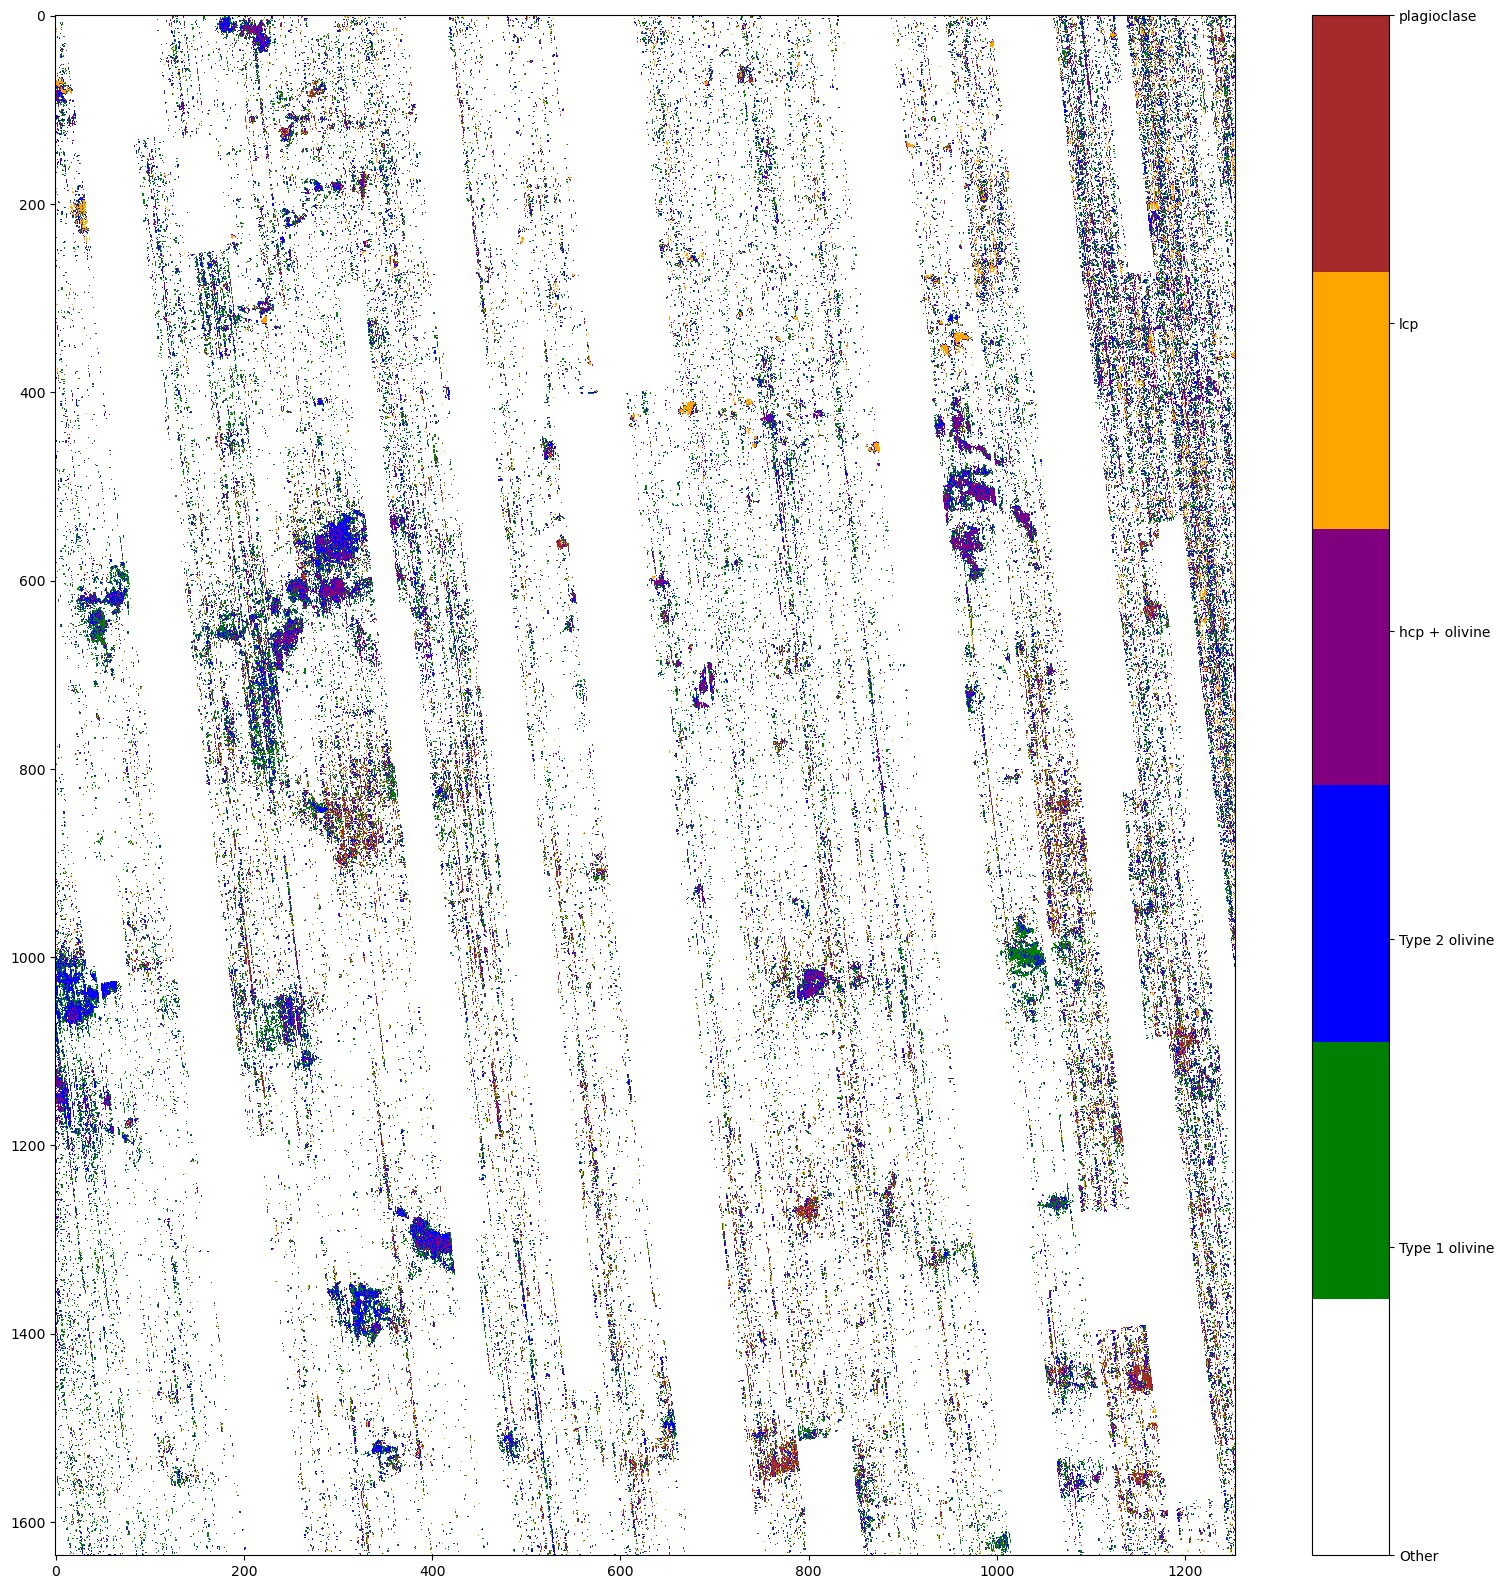

In [175]:
import matplotlib.colors as mcolors

# define figure size
plt.figure(figsize=(20, 20))

# Define a discrete colormap with transparency for the "Other" category
cmap = mcolors.ListedColormap(['none', 'green', 'blue', 'purple', 'orange', 'brown'])

# Output classified image with discrete colormap
plt.imshow(classified_image, cmap=cmap)
# add a color bar showing the classes
cbar = plt.colorbar()
cbar.set_ticks([0, 1, 2, 3, 4, 5])
cbar.set_ticklabels(target_names)
plt.show()

In [ ]:
# save the classified image
import rasterio
from rasterio.transform import from_origin
from rasterio.plot import show

# Define output file path
output_path = f"/Users/phillipsm/Documents/Research/MassifMapping/Argyre_QGIS/t0{tn}_crism_classification.tif"

# Define the transform
transform = from_origin(float(img.metadata['map info'][3]), float(img.metadata['map info'][4]), float(img.metadata['map info'][5]), float(img.metadata['map info'][6]))

# Fix the CRS string
crs_string = 'PROJCS["Equirectangular Mars",GEOGCS["GCS_Mars",DATUM["D_Mars",SPHEROID["Mars",3387887.658233977,0.0]],PRIMEM["Reference_Meridian",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Equidistant_Cylindrical"],PARAMETER["False_Easting",0.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",-37.5],PARAMETER["Standard_Parallel_1",-40.0],UNIT["Meter",1.0]]'

# Define the profile
profile = {
    'driver': 'GTiff',
    'height': classified_image.shape[0],
    'width': classified_image.shape[1],
    'count': 1,
    'dtype': 'uint8',
    'crs': crs_string,
    'transform': transform,
    'compress': 'lzw',
    'nodata': 0
}

# Write the classified image to a GeoTIFF file
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(classified_image.astype('uint8'), 1)

    
# load the classified image
import rasterio
from rasterio.plot import show

# Define the path to the classified image
classified_image_path = "/Users/phillipsm/Documents/Research/MassifMapping/Argyre_QGIS/t0{tn}_crism_classification.tif"

# Open the classified image
with rasterio.open(classified_image_path) as src:
    # Read the image data
    classified_image = src.read(1)
    # Get the colormap
    cmap = src.colormap(1)
    # Plot the classified image
    show((src, 1), title="CRISM Classified Image", cmap=cmap)
    plt.show()

In [176]:
import spectral.io.envi as envi
import numpy as np
import geopandas as gpd
import rasterio
from rasterio.features import shapes
from skimage.morphology import remove_small_objects, remove_small_holes
from shapely.geometry import shape
import colorsys

# Load trained classifier (ensure rf_classifier is defined)
predictions = rf_classifier.predict(flat_data)
probabilities = rf_classifier.predict_proba(flat_data)
confidence = np.max(probabilities, axis=1)

# Define confidence tiers
confidence_tiers = np.digitize(confidence, bins=[0.33, 0.66, 1.0], right=True)

# Reshape back to original image shape
classified_image = predictions.reshape(h, w)
# confidence_image = confidence_tiers.reshape(h, w)
confidence_image = confidence.reshape(h, w)

# Process each class separately for better differentiation
unique_classes = np.unique(classified_image)
cleaned_image = np.zeros_like(classified_image)

for cls in unique_classes:
    class_mask = (classified_image == cls)
    cleaned_class = remove_small_objects(class_mask, min_size=10)
    cleaned_class = remove_small_holes(cleaned_class, area_threshold=10)
    cleaned_image[cleaned_class] = cls

# Convert raster to vector polygons
with rasterio.open(img_path) as src:
    transform = src.transform
    shapes_generator = shapes(cleaned_image.astype(np.uint8), transform=transform, mask=cleaned_image > 0)

import colorsys
import numpy as np

def adjust_color_for_confidence(base_color, confidence, min_adjustment=0.3, max_adjustment=1.0):
    """
    Adjust a color based on confidence while preserving its basic hue.
    
    Args:
        base_color (tuple): RGB color tuple (values from 0-1)
        confidence (float): Confidence value (0-1)
        min_adjustment (float): Minimum brightness multiplier
        max_adjustment (float): Maximum brightness multiplier
    
    Returns:
        tuple: Adjusted RGB color
    """
    h, l, s = colorsys.rgb_to_hls(*base_color)
    
    # Scale confidence to preserve more of the original color
    # This creates a narrower range of adjustment
    adjusted_confidence = min_adjustment + (confidence * (max_adjustment - min_adjustment))
    
    # Adjust saturation instead of lightness to maintain color distinctiveness
    new_s = s * adjusted_confidence
    
    # Keep some minimum saturation to preserve color identity
    new_s = max(0.4 * s, new_s)
    
    # Convert back to RGB
    return colorsys.hls_to_rgb(h, l, new_s)

def rgb_to_hex(rgb_color):
    """Convert RGB tuple to hex color string"""
    return '#{:02x}{:02x}{:02x}'.format(
        int(rgb_color[0] * 255),
        int(rgb_color[1] * 255),
        int(rgb_color[2] * 255)
    )

# Your existing class labels and base colors
class_labels = {
    1: 'Type 1 olivine',
    2: 'Type 2 olivine',
    3: 'hcp + olivine',
    4: 'lcp',
    5: 'plagioclase'
}

base_colors = {
    1: (0, 1, 0),      # Green
    2: (1, 0, 0),      # Red
    3: (0.5, 0, 0.5),  # Purple
    4: (0, 1, 1),      # Cyan
    5: (1, 1, 0)       # Yellow
}

# Modified main processing loop
polygons, values, conf_levels, colors, labels = [], [], [], [], []
for geom, value in shapes_generator:
    if value in unique_classes:
        polygons.append(shape(geom))
        values.append(value)
        
        # Create mask for confidence calculation
        mask = np.zeros_like(classified_image, dtype=bool)
        coords = np.array(shape(geom).exterior.coords.xy)
        coords[0] = (coords[0] - transform[2]) / transform[0]
        coords[1] = (coords[1] - transform[5]) / transform[4]
        rounded_coords = np.round(coords).astype(int)
        rounded_coords[1] = np.clip(rounded_coords[1], 0, w - 1)
        rounded_coords[0] = np.clip(rounded_coords[0], 0, h - 1)
        mask[tuple(rounded_coords)] = True
        
        # Calculate confidence and adjust color
        conf_level = confidence_image[mask].mean()
        conf_levels.append(conf_level)
        labels.append(class_labels.get(value, 'Unknown'))
        
        # Get and adjust base color
        base_color = base_colors.get(value, (0, 0, 0))
        adjusted_color = adjust_color_for_confidence(base_color, conf_level)
        colors.append(rgb_to_hex(adjusted_color))

# Create GeoDataFrame
gdf = gpd.GeoDataFrame({'class': values, 'label': labels, 'confidence': conf_levels, 'color': colors}, geometry=polygons, crs=src.crs)

# Save as GeoPackage
gdf.to_file(f"/Users/phillipsm/Documents/Research/MassifMapping/Argyre_QGIS/shape_files/t0{tn}_crism_classification_conf_2.gpkg", driver="GPKG")